# Billboard Hot 100 Analysis &

# Machine Learning Project

### Name: 

- Cesario Angel Ibarra


## Details
Investigate and exploit the insights of the Billboard Hot 100 (1958 to 2020)
- Exploit how similar the majority of tracks are on the list; no matter the genre
- Understand why Hot 100 tracks all sound the same and are very similar in compositional structure
- Although musical genre is established by supposedly a myriad of determining factors e.g. culture, time and place etc. not to forget all of the rules that music theory has to offer.
- Nevertheless here in this Analysis we will only worry about the empirical data; the audio features of a given track. the only musical theory involved here is Key Signature(Key and Mode), Time Signature and Tempo. These features are simply semantic representions of Frequency, Beats per Measure, and Beats per minute. Nothing theoretical here will be considered.
- Fundamentally, music is time, energy, and motion.
- Music is math and we will explore these virtues of the music on the Billboard Hot 100
## Explorative Analysis
### Part 2

I will use both barcharts and density plots to check the distribution of variables in the dataset.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Set columns view to max
pd.set_option('display.max_columns', None)

In [2]:
# read the df from the pickle file
viz_df = pd.read_pickle('hot100df_distinct.pkl')
viz_df

,performer,song_performer,song,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,rank,last_week,peak_rank,weeks_on_board,key_signature,year
0,Andy Williams,......And Roses And Roses | Andy Williams,......And Roses And Roses,166.106,0.154,0.185,F,-14.063,major,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,1965-05-15,43,36.0,36,7,F major,1965
1,Britney Spears,...Baby One More Time | Britney Spears,...Baby One More Time,211.066,0.759,0.699,C,-5.745,minor,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,1999-06-26,49,46.0,1,32,C minor,1999
2,Paul Davis,'65 Love Affair | Paul Davis,'65 Love Affair,219.813,0.647,0.686,D,-4.247,minor,0.0274,0.43200,0.000006,0.1330,0.952,155.697,4.0,1982-07-10,100,95.0,6,20,D minor,1982
3,Tammy Wynette,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,182.080,0.450,0.294,G,-12.022,major,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4.0,1976-05-29,84,84.0,84,5,G major,1976
4,Luther Vandross,'Til My Baby Comes Home | Luther Vandross,'Til My Baby Comes Home,332.226,0.804,0.714,B,-6.714,minor,0.1830,0.05670,0.000006,0.0253,0.802,139.663,4.0,1985-06-29,99,84.0,29,16,B minor,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,The Trammps,Zing Went The Strings Of My Heart | The Trammps,Zing Went The Strings Of My Heart,202.693,0.667,0.851,E,-5.257,major,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,1972-09-16,65,64.0,64,11,E major,1972
13054,The Five Americans,Zip Code | The Five Americans,Zip Code,175.040,0.393,0.594,A,-5.986,major,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,1967-09-23,58,36.0,36,7,A major,1967
13055,Bad Wolves,Zombie | Bad Wolves,Zombie,254.805,0.448,0.826,D,-3.244,minor,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,2018-07-14,95,90.0,54,17,D minor,2018
13056,Herb Alpert & The Tijuana Brass,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,264.853,0.531,0.642,F,-12.702,major,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,1966-03-12,43,21.0,11,12,F major,1966


### Density Plot, visualizing: 
- Danceability: Based on a combo of tempo, rhytmic stability, beat; measuring how suitable a song is for dancing.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- Speechiness: speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

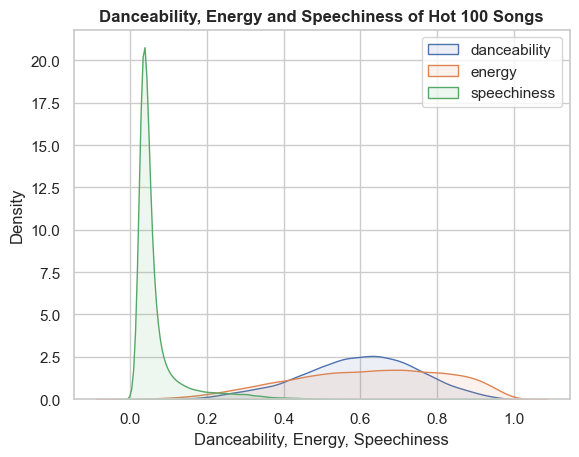

In [3]:
# Viz w Density plot
sns.set_palette('Accent')
sns.set(style='whitegrid')
sns.kdeplot(data=viz_df, x='danceability', fill=True, alpha=0.1, label='danceability')
sns.kdeplot(data=viz_df, x='energy', fill=True, alpha=0.1, label='energy')
sns.kdeplot(data=viz_df, x='speechiness', fill=True, alpha=0.1, label='speechiness')
plt.xlabel('Danceability, Energy, Speechiness')
plt.ylabel('Density')
plt.title('Danceability, Energy and Speechiness of Hot 100 Songs', fontsize=12, fontweight='bold')
plt.legend(title='')
plt.show()

### Visualizing:
- Acousticness: Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Valence: Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

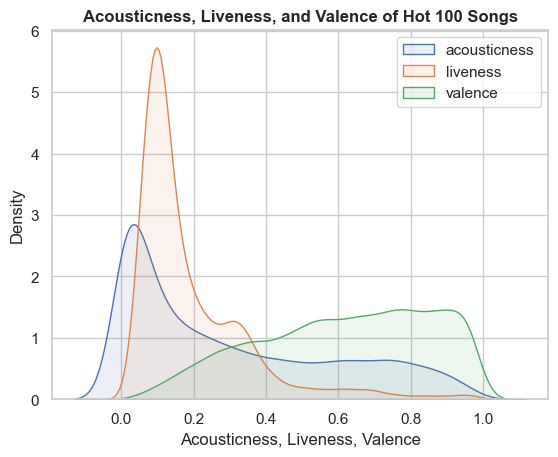

In [4]:
# Viz w Density plot
sns.set_palette('Accent')
sns.set(style='whitegrid')
sns.kdeplot(data=viz_df, x='acousticness', fill=True, alpha=0.1, label='acousticness')
sns.kdeplot(data=viz_df, x='liveness', fill=True, alpha=0.1, label='liveness')
sns.kdeplot(data=viz_df, x='valence', fill=True, alpha=0.1, label='valence')
plt.xlabel('Acousticness, Liveness, Valence')
plt.ylabel('Density')
plt.title('Acousticness, Liveness, and Valence of Hot 100 Songs', fontsize=12, fontweight='bold')
plt.legend(title='')
plt.show()

### Based on these plots a few things about Billboard Hot 100 songs can be noted:

- most songs have quite a high danceability, between 0.5 and 0.75; 
- the distribution of energy across songs is almost normal, meaning that songs range from up-beat to slow and calm options;
- a prevailing majority of tracks have speechiness between 0 and 0.1, meaning that a lot of tracks have very few lyrics;
- acousticness of songs is also quite left-skewed. Highly acoustic songs mainly contain orchestral instruments, an unaltered voice, acoustic guitars and natural drum kits, whereas less acoustic songs contain, for example, synthesizers, electric guitars and amplified instruments;
- liveness is very left-skewed, which makes sense as most of the tracks on Billboard are studio recordings, with a low probability of audience being present;
- valence of most of the songs is higher than 0.5, meaning that most Billboard tracks are indeed positive.

### Now we can have a look at the distribution of 
- loudness
- duration in seconds 
- time signature
- tempo
- liveness
- acousticness
- energy
- valence
- danceability

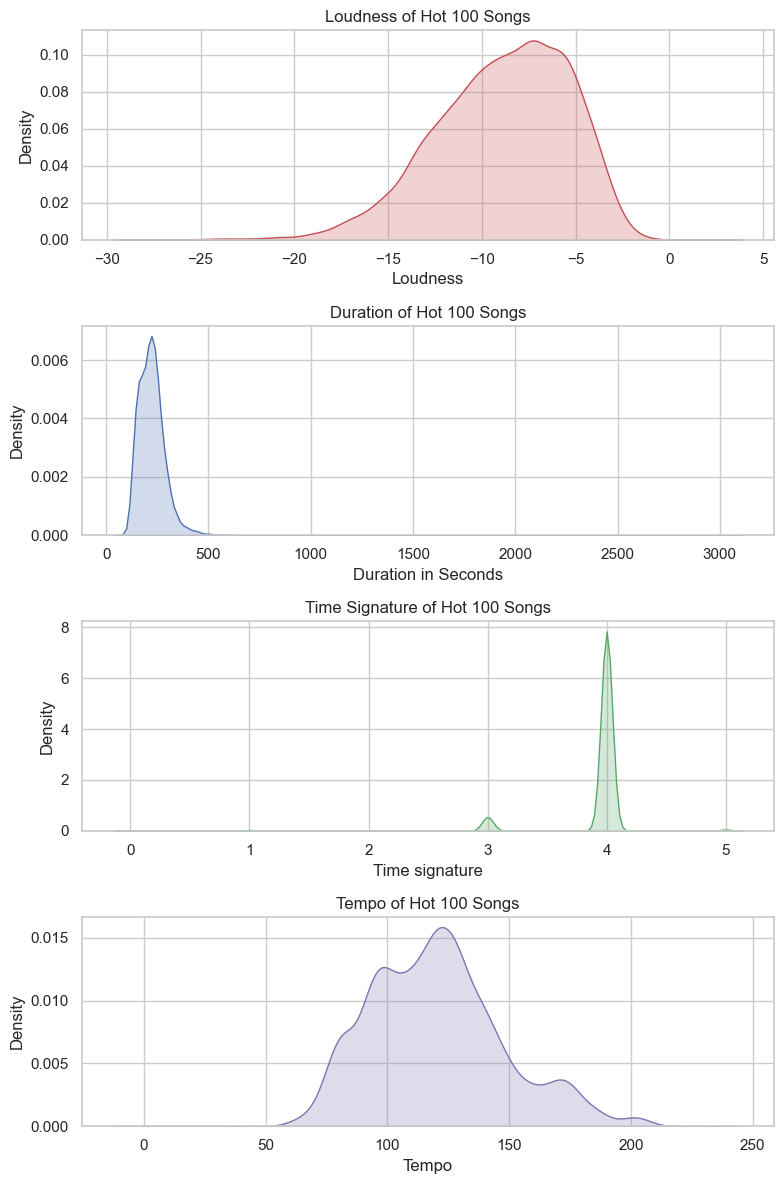

In [5]:
sns.set_palette('Accent')
sns.set(style='whitegrid')

# Create a figure with four subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plot the loudness density
sns.kdeplot(viz_df['loudness'], fill=True, color="r", ax=axs[0])
axs[0].set_title("Loudness of Hot 100 Songs")
axs[0].set_xlabel("Loudness")
axs[0].set_ylabel("Density")

# Plot the duration density
sns.kdeplot(viz_df['track_duration_s'], fill=True, color="b", ax=axs[1])
axs[1].set_title("Duration of Hot 100 Songs")
axs[1].set_xlabel("Duration in Seconds")
axs[1].set_ylabel("Density")

# Plot the time signature density
sns.kdeplot(viz_df['time_signature'], fill=True, color="g", ax=axs[2])
axs[2].set_title("Time Signature of Hot 100 Songs")
axs[2].set_xlabel("Time signature")
axs[2].set_ylabel("Density")

# Plot the tempo density
sns.kdeplot(viz_df['tempo'], fill=True, color="m", ax=axs[3])
axs[3].set_title("Tempo of Hot 100 Songs")
axs[3].set_xlabel("Tempo")
axs[3].set_ylabel("Density")

# Show the plot
plt.tight_layout()
plt.show()

### Based on these graphs the following insights can be derived:

- Most of the Billboard tracks indeed are moderately loud;
- Duration is on average 225 seconds (3 minutes and 45 seconds);
- Majority of tracks has a time signature of 4/4 or four quarter note beats, which is extremely common in the music industry;
- most of the tracks have the tempo of around 125 beats per minute (BPM), again extremely commmon

### Now lets plot key signatures across all tracks

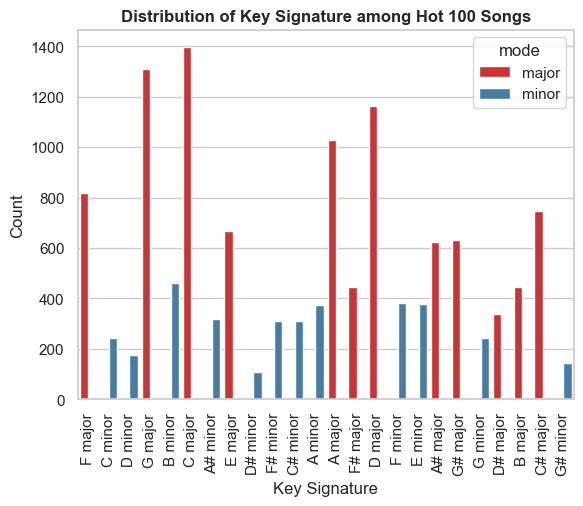

In [6]:
# Plot the distribution of key signatures
sns.countplot(x='key_signature', hue='mode', data=viz_df, palette='Set1')

# Set the title and axis labels
plt.title("Distribution of Key Signature among Hot 100 Songs", fontweight='bold')
plt.xlabel("Key Signature")
plt.ylabel("Count")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

### The most popular keys among billboard tracks are C major, G major and D major:
It’s logical that major keys dominate the distribution as they are perceived to be happy, while minor keys are perceived to be sad. 
### Personal Note 
AS for us musicians and composers, we have all known this for a very long time. Although not displayed here, the four most chords in C major are C, G, Am, F, also Dm, E. As for this chord progression (I-IV-V-vi) can be heard and seen in all throughout the Hot 100 
- Best example of this fact being exploited, is by the band Axis of Awesome https://www.youtube.com/watch?v=5pidokakU4I&t=4s
- This is also why musicians in Pop cover bands can easily remember hundreds of songs; 

### SPOILER ALERT because they're all the same

## Variation of Grooves and Emotional State
Displaying the variation of each feature over time; from 1958 to 2020
- Danceability
- Energy
- Valence
- Loudness
- Acousticness
- Duration

### Let's check out Danceability

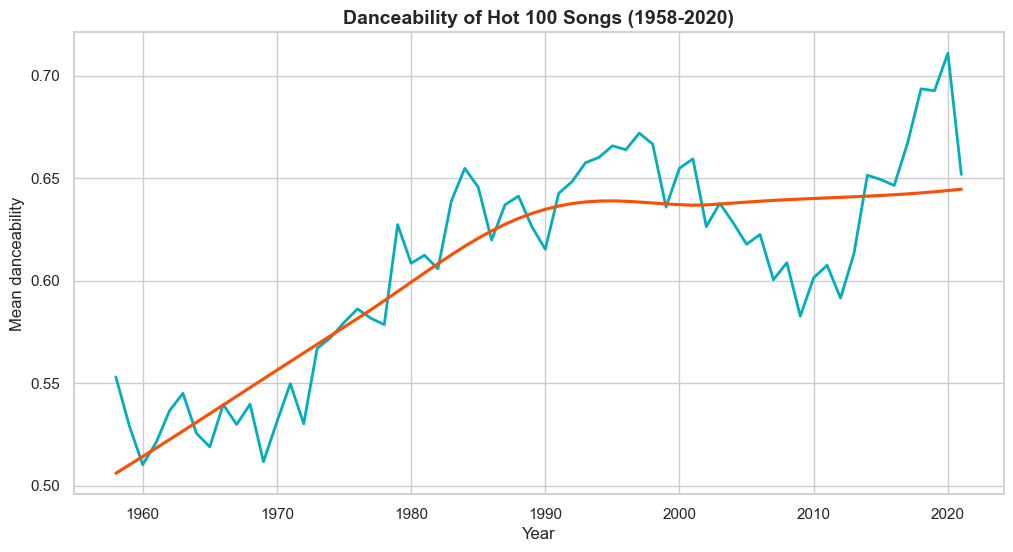

In [7]:
danceability_trend = viz_df[['danceability', 'year']].groupby('year').mean().reset_index()
danceability_trend.columns = ['year', 'danceability_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='danceability_mean', data=danceability_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='danceability_mean', data=danceability_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Danceability of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean danceability")
plt.show()

### Energy over time

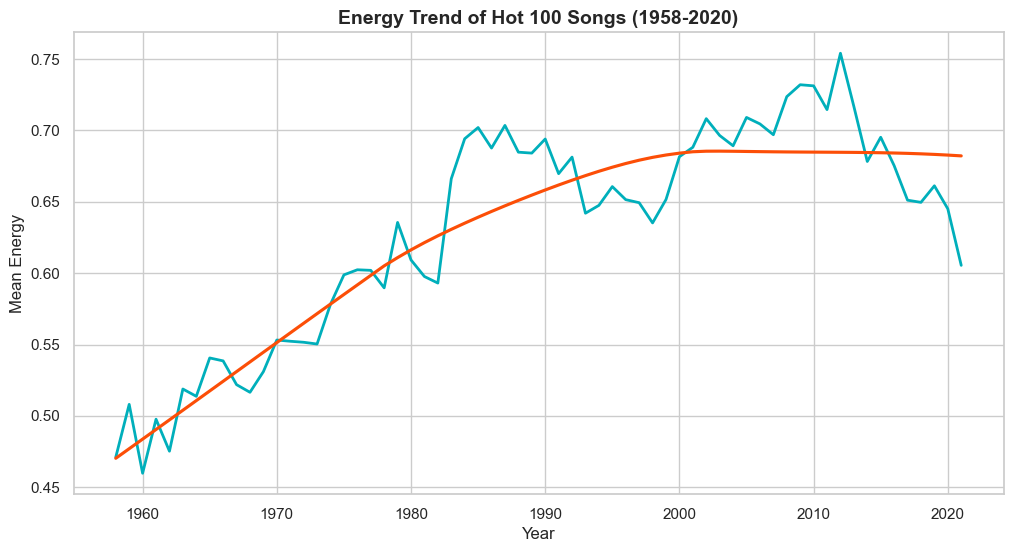

In [8]:
energy_trend = viz_df[['energy', 'year']].groupby('year').mean().reset_index()
energy_trend.columns = ['year', 'energy_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='energy_mean', data=energy_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='energy_mean', data=energy_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Energy Trend of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean Energy")
plt.show()

### Valence or Emotioal State Trend Over Time

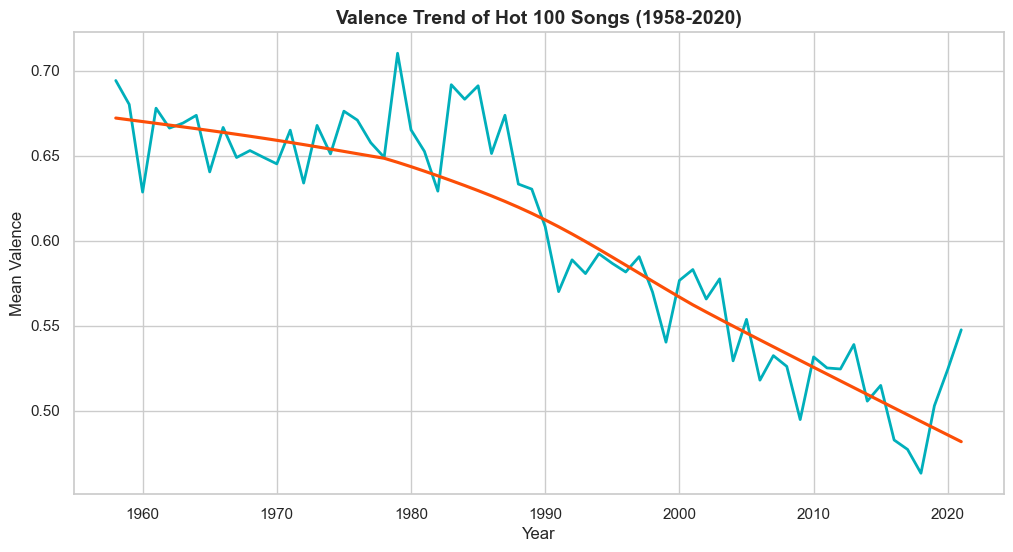

In [9]:
valence_trend = viz_df[['valence', 'year']].groupby('year').mean().reset_index()
valence_trend.columns = ['year', 'valence_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='valence_mean', data=valence_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='valence_mean', data=valence_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Valence Trend of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean Valence")
plt.show()

### Loudness

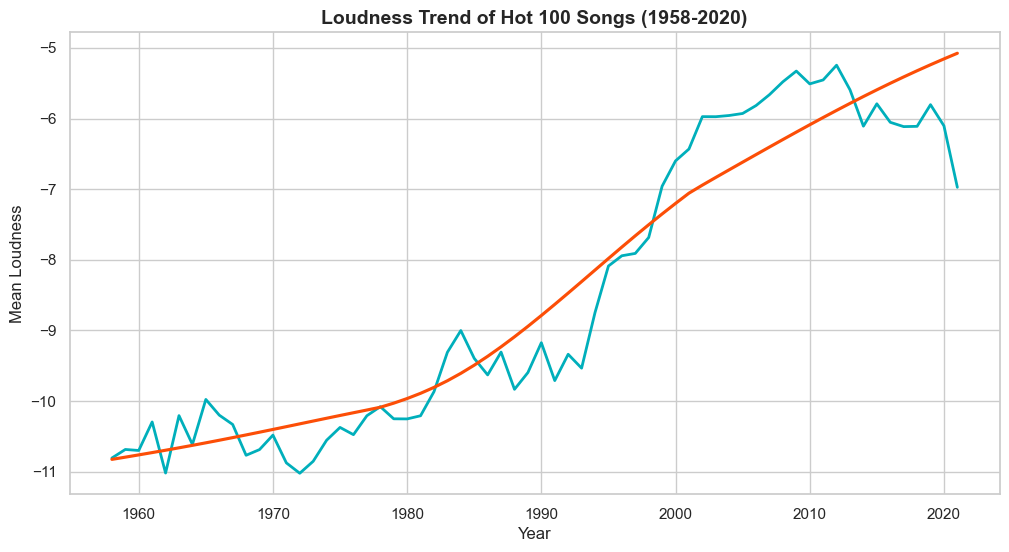

In [10]:
loudness_trend = viz_df[['loudness', 'year']].groupby('year').mean().reset_index()
loudness_trend.columns = ['year', 'loudness_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='loudness_mean', data=loudness_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='loudness_mean', data=loudness_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Loudness Trend of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean Loudness")
plt.show()

### Acousticness Trend

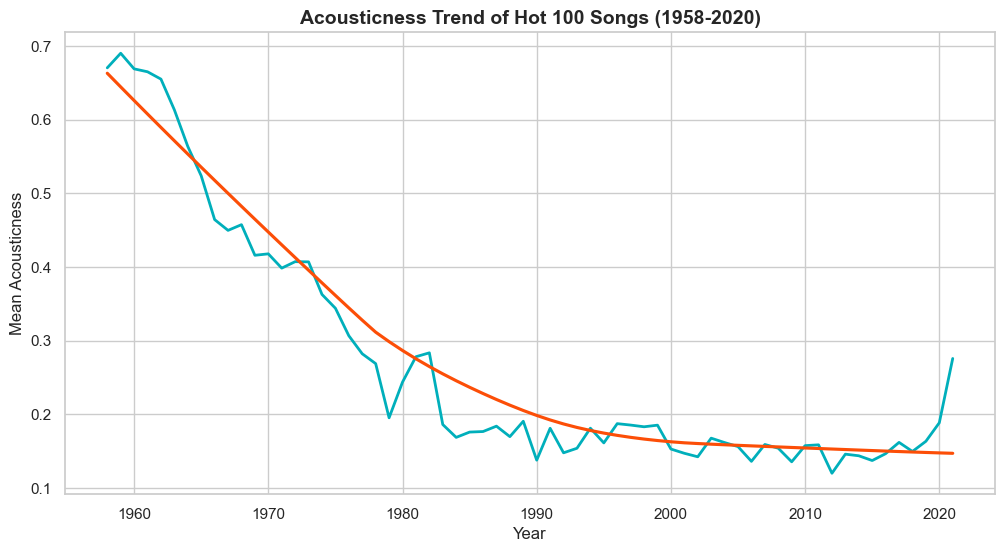

In [11]:
acousticness_trend = viz_df[['acousticness', 'year']].groupby('year').mean().reset_index()
acousticness_trend.columns = ['year', 'acousticness_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='acousticness_mean', data=acousticness_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='acousticness_mean', data=acousticness_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Acousticness Trend of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean Acousticness")
plt.show()

### Duration of Tracks Over Time 

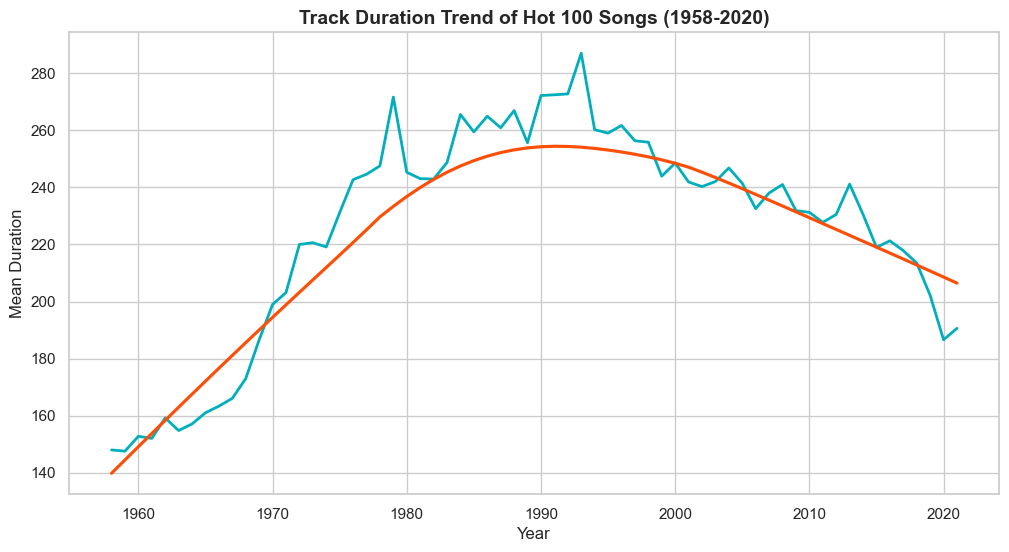

In [12]:
track_duration_trend = viz_df[['track_duration_s', 'year']].groupby('year').mean().reset_index()
track_duration_trend.columns = ['year', 'track_duration_s_mean']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='track_duration_s_mean', data=track_duration_trend, color="#00AFBB", linewidth=2)
sns.regplot(x='year', y='track_duration_s_mean', data=track_duration_trend, scatter=False, color="#FC4E07", lowess=True)
plt.title("Track Duration Trend of Hot 100 Songs (1958-2020)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean Duration")
plt.show()

## Valence-arousal model
- Valence arousal is the combination of the emotional state of a track and the amount of emotion articulated. (Valence and Energy = Arousal)
- High valence = happy
- Low valence = sad 
- Q1 — “happy”: valence > 0.5, arousal (energy) > 0.5;
- Q2 — “excited”: valence <= 0.5, arousal (energy) > 0.5;
- Q3 — “sad”: valence <= 0.5, arousal (energy) <= 0.5;
- Q4 — “peaceful”: valence > 0.5, arousal (energy) <= 0.5

In [13]:
viz_df

,performer,song_performer,song,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,rank,last_week,peak_rank,weeks_on_board,key_signature,year
0,Andy Williams,......And Roses And Roses | Andy Williams,......And Roses And Roses,166.106,0.154,0.185,F,-14.063,major,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,1965-05-15,43,36.0,36,7,F major,1965
1,Britney Spears,...Baby One More Time | Britney Spears,...Baby One More Time,211.066,0.759,0.699,C,-5.745,minor,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,1999-06-26,49,46.0,1,32,C minor,1999
2,Paul Davis,'65 Love Affair | Paul Davis,'65 Love Affair,219.813,0.647,0.686,D,-4.247,minor,0.0274,0.43200,0.000006,0.1330,0.952,155.697,4.0,1982-07-10,100,95.0,6,20,D minor,1982
3,Tammy Wynette,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,182.080,0.450,0.294,G,-12.022,major,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4.0,1976-05-29,84,84.0,84,5,G major,1976
4,Luther Vandross,'Til My Baby Comes Home | Luther Vandross,'Til My Baby Comes Home,332.226,0.804,0.714,B,-6.714,minor,0.1830,0.05670,0.000006,0.0253,0.802,139.663,4.0,1985-06-29,99,84.0,29,16,B minor,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,The Trammps,Zing Went The Strings Of My Heart | The Trammps,Zing Went The Strings Of My Heart,202.693,0.667,0.851,E,-5.257,major,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,1972-09-16,65,64.0,64,11,E major,1972
13054,The Five Americans,Zip Code | The Five Americans,Zip Code,175.040,0.393,0.594,A,-5.986,major,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,1967-09-23,58,36.0,36,7,A major,1967
13055,Bad Wolves,Zombie | Bad Wolves,Zombie,254.805,0.448,0.826,D,-3.244,minor,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,2018-07-14,95,90.0,54,17,D minor,2018
13056,Herb Alpert & The Tijuana Brass,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,264.853,0.531,0.642,F,-12.702,major,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,1966-03-12,43,21.0,11,12,F major,1966


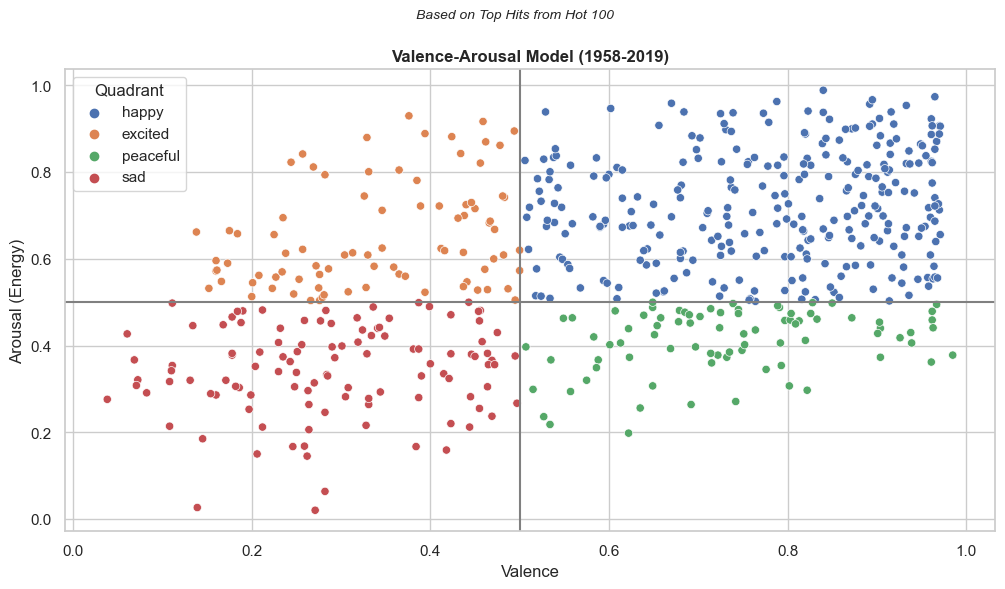

In [14]:
# New object for all peak rank of 1
billboard_filtered = viz_df[viz_df['peak_rank'] == 1].copy()

# New object for Quads
billboard_filtered['quadrant'] = np.where(billboard_filtered['energy'] > 0.5, 
np.where(billboard_filtered['valence'] > 0.5, 'happy', 'excited'), 
np.where(billboard_filtered['valence'] > 0.5, 'peaceful', 'sad'))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='valence', y='energy', hue='quadrant', data=billboard_filtered)
plt.axvline(x=0.5, color='gray')
plt.axhline(y=0.5, color='gray')
plt.title("Valence-Arousal Model (1958-2019)", fontsize=12, fontweight='bold')
plt.suptitle("Based on Top Hits from Hot 100", fontsize=10, fontstyle='italic')
plt.xlabel("Valence")
plt.ylabel("Arousal (Energy)")
plt.legend(title="Quadrant")
plt.show()

### Notice most of tracks on the Billboard Hot 100 hits are  “happy”, with a significant share of “sad” tracks. 

## Last obvservations into Top Artist and Track Frequency:
- Groupby Performer  
- Agg number of song_performer entries
- Plot Most Tracks by one artist

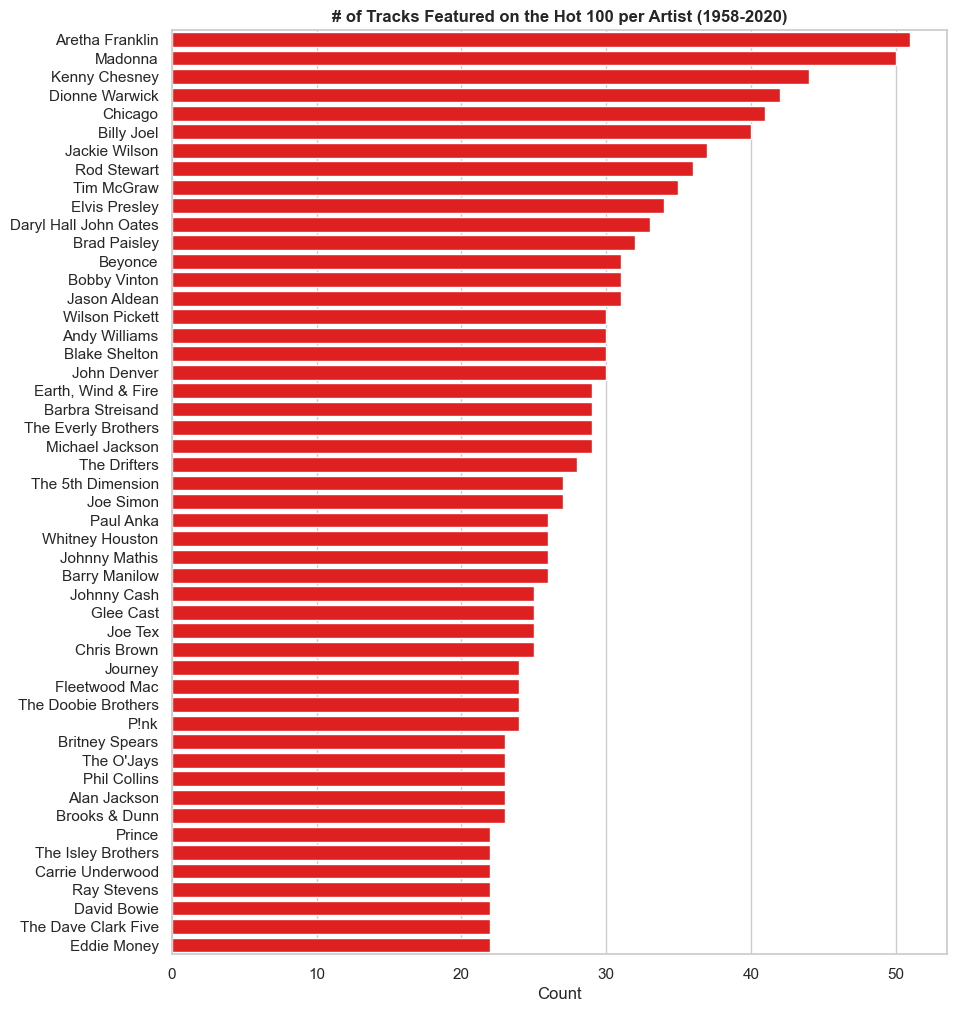

In [15]:
# New object for performers_entries
performers_entries = (viz_df[['performer', 'song', 'song_performer']]
                      .groupby('performer')
                      .agg(n_entries=('song_performer', 'nunique'))
                      .reset_index()
                      .sort_values('n_entries', ascending=False)
                      .head(50))
# Plot Most Tracks by 1 Artist
sns.set_style("whitegrid")
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='n_entries', y='performer', data=performers_entries, color="red")
ax.set_title("# of Tracks Featured on the Hot 100 per Artist (1958-2020)", fontsize=12, fontweight='bold')
ax.set(xlabel='Count', ylabel='')
plt.show()

### First, there is a discrepancy;
this is due to dropping all the null values and a few top artists are obviously missing
- Import uncleaned dataset from hot100.csv
- visualize the difference


In [16]:
file1 = 'Hot100.csv'
unclean_hot_df = pd.read_csv(file1)
unclean_hot_df

,Song_Performer,Song,Performer,Genre,Track_Duration_s,Track_Album,Danceability,Key,Mode,Valence,Tempo,Time_Sign,Date,Rank,Last_Week,Peak_Rank,Weeks_On_Board,Year,Key_Sign
0,'03 Bonnie & Clyde | Jay-Z Featuring Beyonce K...,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['east coast hip hop', 'hip hop', 'pop rap', '...",205.560,The Blueprint 2 The Gift & The Curse,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-07,8,11.0,8,7,2020.0,NA NA
1,'65 Love Affair | Paul Davis,'65 Love Affair,Paul Davis,"['album rock', 'bubblegum pop', 'country rock'...",219.813,Radio Hits Of the '80s,0.647,D,minor,0.952,155.697,4.0,2019-06-05,9,6.0,6,15,2019.0,D minor
2,"'98 Thug Paradise | Tragedy, Capone, Infinite",'98 Thug Paradise,"Tragedy, Capone, Infinite",['english indie rock'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17,99,91.0,86,5,2019.0,NA NA
3,'Round We Go | Big Sister,'Round We Go,Big Sister,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06,91,NaN,91,1,2019.0,NA NA
4,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,Tammy Wynette,"['country', 'country dawn', 'nashville sound']",182.080,The Essential Tammy Wynette,0.450,G,major,0.146,141.148,4.0,2019-05-01,100,NaN,100,1,2019.0,G major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24245,Zombie | Bad Wolves,Zombie,Bad Wolves,"['alternative metal', 'metal', 'post-grunge']",254.805,Zombie,0.448,D,minor,0.190,77.093,4.0,2020-04-28,74,67.0,54,6,2020.0,D minor
24246,Zoo York | Lil Tjay Featuring Fivio Foreign & ...,Zoo York,Lil Tjay Featuring Fivio Foreign & Pop Smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-23,65,NaN,65,1,2020.0,NA NA
24247,Zoom | Future,Zoom,Future,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",278.429,FUTURE,0.852,A,major,0.627,150.945,4.0,2020-03-11,99,NaN,99,1,2020.0,A major
24248,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,Herb Alpert & The Tijuana Brass,"['adult standards', 'easy listening', 'lounge']",264.853,!!!Going Places!!!,0.531,F,major,0.192,82.107,4.0,2019-01-29,24,33.0,24,6,2019.0,F major


### Now let's plot the difference

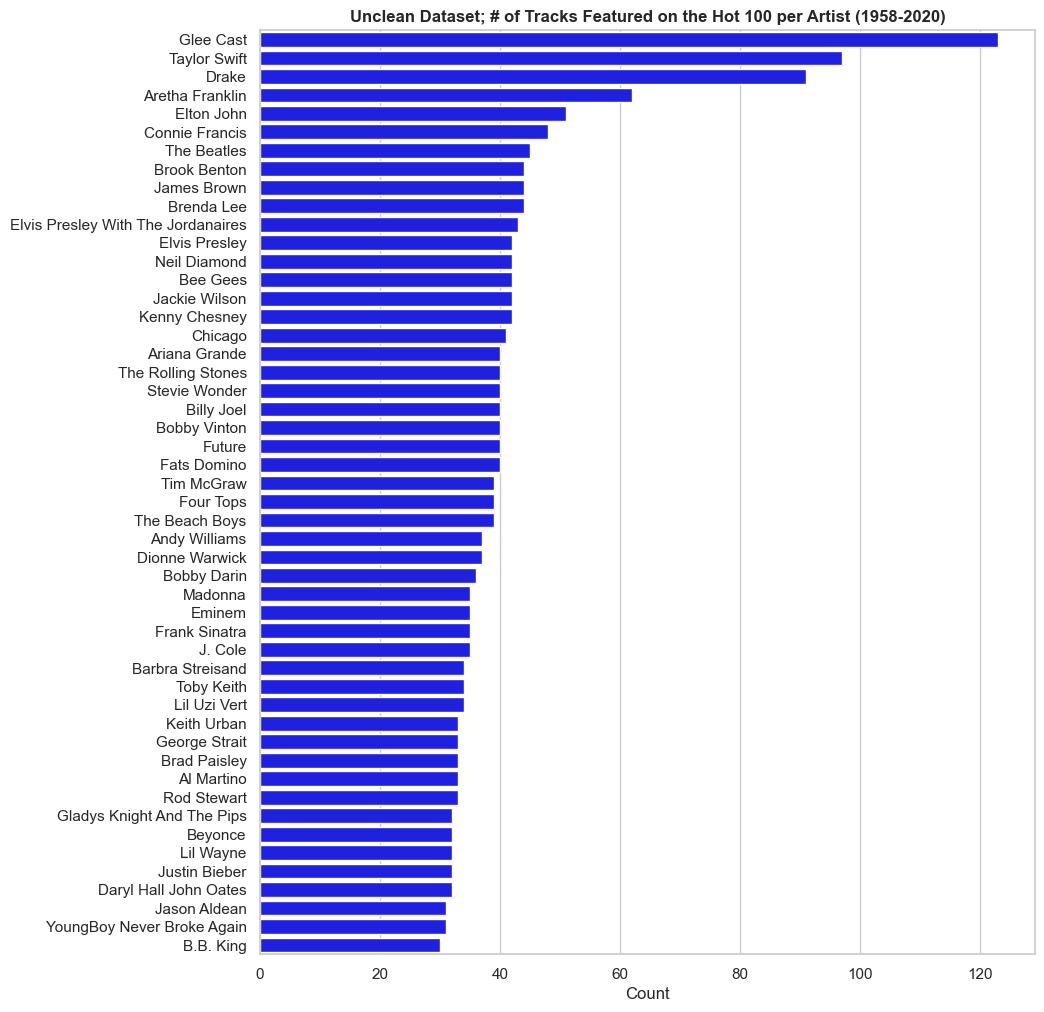

In [17]:
# New object for performers_entries
unclean_perform_entries = (unclean_hot_df[['Performer', 'Song', 'Song_Performer']]
                      .groupby('Performer')
                      .agg(n_entries=('Song_Performer', 'nunique'))
                      .reset_index()
                      .sort_values('n_entries', ascending=False)
                      .head(50))
# Plot Most Tracks by 1 Artist
sns.set_style("whitegrid")
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='n_entries', y='Performer', data=unclean_perform_entries, color="blue")
ax.set_title("Unclean Dataset; # of Tracks Featured on the Hot 100 per Artist (1958-2020)", fontsize=12, fontweight='bold')
ax.set(xlabel='Count', ylabel='')
plt.show()

### Here we can see the missing Artist
- removing null values can sometimes hide the truth
- be cautious 
- Important Artist like The Beatles, Ariana Grande, Drake, Taylor Swift and surprisingly, the Cast of Glee; all missing and also occupying spots in the top thirty.

### Let's use another unclean dataset to explore a few more insights
- Number of times a single track appears per artist 

In [18]:
unclean_total_hotdf = pd.read_pickle('hot100_total_unclean.pkl')
unclean_total_hotdf

,Performer,Song,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,rank,last-week,peak-rank,weeks-on-board
6,Andy Williams,......And Roses And Roses,166106.0,0.154,0.185,5.0,-14.063,1.0,0.0315,0.9110,0.000267,0.1120,0.150,83.969,4.0,5/15/1965,43,36.0,36,7
7,Andy Williams,......And Roses And Roses,166106.0,0.154,0.185,5.0,-14.063,1.0,0.0315,0.9110,0.000267,0.1120,0.150,83.969,4.0,5/8/1965,36,37.0,36,6
8,Andy Williams,......And Roses And Roses,166106.0,0.154,0.185,5.0,-14.063,1.0,0.0315,0.9110,0.000267,0.1120,0.150,83.969,4.0,5/1/1965,37,40.0,37,5
9,Andy Williams,......And Roses And Roses,166106.0,0.154,0.185,5.0,-14.063,1.0,0.0315,0.9110,0.000267,0.1120,0.150,83.969,4.0,4/24/1965,40,50.0,40,4
10,Andy Williams,......And Roses And Roses,166106.0,0.154,0.185,5.0,-14.063,1.0,0.0315,0.9110,0.000267,0.1120,0.150,83.969,4.0,4/17/1965,50,61.0,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328980,K7,Zunga Zeng,273000.0,0.846,0.657,1.0,-9.642,1.0,0.1400,0.0478,0.000363,0.0392,0.619,103.743,4.0,3/5/1994,62,62.0,62,6
328981,K7,Zunga Zeng,273000.0,0.846,0.657,1.0,-9.642,1.0,0.1400,0.0478,0.000363,0.0392,0.619,103.743,4.0,2/26/1994,62,67.0,62,5
328982,K7,Zunga Zeng,273000.0,0.846,0.657,1.0,-9.642,1.0,0.1400,0.0478,0.000363,0.0392,0.619,103.743,4.0,2/19/1994,67,68.0,67,4
328983,K7,Zunga Zeng,273000.0,0.846,0.657,1.0,-9.642,1.0,0.1400,0.0478,0.000363,0.0392,0.619,103.743,4.0,2/12/1994,68,75.0,68,3


### Create new column for number of times a single track (song) appears on the Hot 100

In [19]:
unclean_total_hotdf['song_performer'] = unclean_total_hotdf['Song'].str.cat(unclean_total_hotdf['Performer'], sep=' | ')
cols = list(unclean_total_hotdf.columns)
cols.insert(cols.index('Song'), cols.pop(cols.index('song_performer')))
unclean_total_hotdf = unclean_total_hotdf[cols]

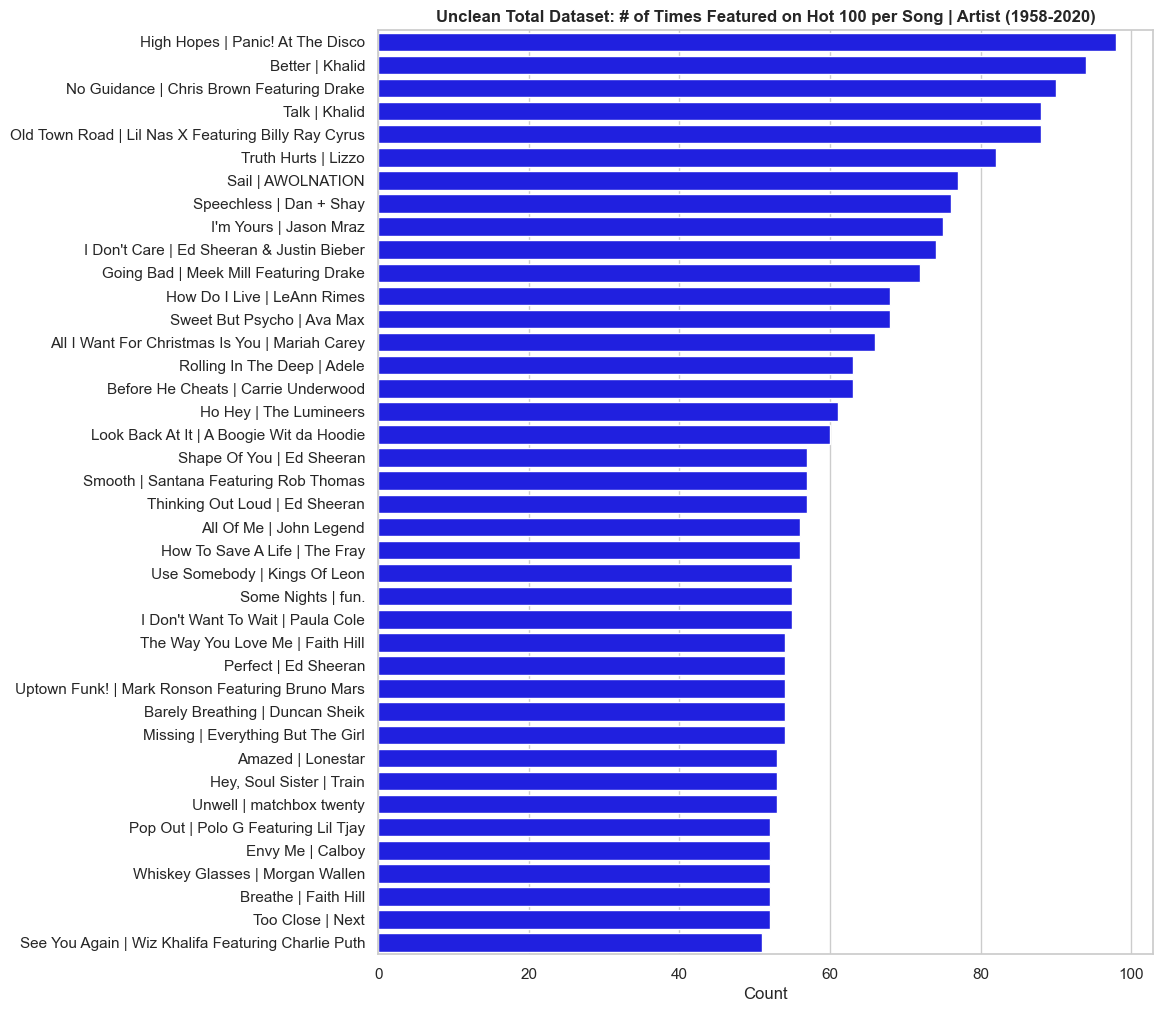

In [20]:
# New object for song_entries
unclean_songs_entries = (unclean_total_hotdf[['song_performer']]
                 .groupby('song_performer')
                 .size()
                 .reset_index(name='n_entries')
                 .sort_values('n_entries', ascending=False)
                 .head(40))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='n_entries', y='song_performer', data=unclean_songs_entries, color="blue")
ax.set_title("Unclean Total Dataset: # of Times Featured on Hot 100 per Song | Artist (1958-2020)", fontsize=12, fontweight='bold')
ax.set(xlabel='Count', ylabel='')
plt.show()

### Number of times an Artist reached the No. 1 Spot

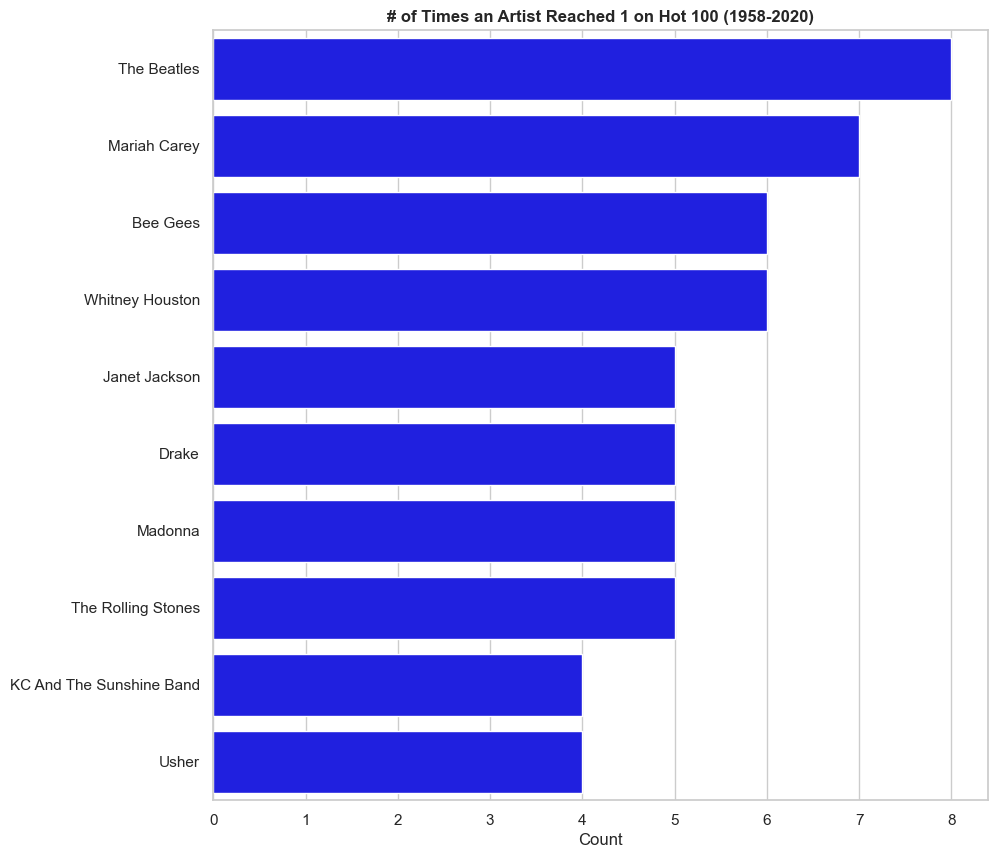

In [21]:
# Create new object
top_performers = (unclean_hot_df[unclean_hot_df['Peak_Rank'] == 1][['Performer', 'Song', 'Song_Performer']]
                  .groupby('Performer')
                  .agg(n_entries=('Song_Performer', 'nunique'))
                  .reset_index()
                  .sort_values('n_entries', ascending=False)
                  .head(10))

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='n_entries', y='Performer', data=top_performers, color="blue")
ax.set_title("# of Times an Artist Reached 1 on Hot 100 (1958-2020)", fontsize=12, fontweight='bold')
ax.set(xlabel='Count', ylabel='')
plt.show()

### In the end we can see The Beatles remain on top:
- After all this time and with two Beatles still rocking (Paul and Ringo) at the age of 81 and 82, The Beatles still reign supreme at capturing the Number 1 Spot.
- Cool

### Pickle df's for future use

In [24]:
viz_df.to_pickle('vizual_df.pkl')
unclean_hot_df.to_pickle('semiclean_hot_df.pkl')
unclean_total_hotdf.to_pickle('unclean_total_hot_df.pkl')